In [7]:
import numpy as np
from solver import freq_top_opt_2D

In [8]:
%matplotlib inline

In [9]:
verbose = False
if not verbose:
    import warnings
    warnings.filterwarnings("ignore")

In [10]:
r = 1 # mesh refinement factor
scaling =  1e-9/r # the scale applied to the physical problem
fR = int(6*r) #int(r*3) # value for the filtering radius   
nElx = int(r*200) + 2*fR #400 # the number of elements in the X axis
nEly = int(r*100) + 2*fR #200 # the number of elements in the Y axis
tElmIdx = [int(r*100)+ fR, int(r*40)+ fR] #[200,100] # the target element for the optimization of the FOM
thickness = int(r*10) #15 # the thickness of the design region, in number of elements in the Y direction
limit = int(np.floor((nEly-2*fR)*9/10))+fR # the lower limit of the design region, 0.9 * total height of the simulation volume
dVElmIdx = np.array([np.arange(limit-thickness,limit),np.arange(fR,nElx-fR)])  # the indexes of the domain of the  design variables

DVini = 0.0 * np.ones(len(dVElmIdx[0])*len(dVElmIdx[1])) # the initial value / guess for the design parameters
#np.random.seed(42)
#DVini = np.random.rand(len(dVElmIdx[0])*len(dVElmIdx[1]))

thickness_part = int(r*75)
height_part = int(r*50)
dVElmIdx_part = np.array([np.arange(tElmIdx[1]-height_part//2,tElmIdx[1]+height_part//2),np.arange(tElmIdx[0]-thickness_part//2,tElmIdx[0]+thickness_part//2)])  # the indexes of the domain of the  design variables
DVini_part =0.5 * np.ones(len(dVElmIdx_part[0])*len(dVElmIdx_part[1])) # the initial value / guess for the design parameters


#DVini_part = np.random.rand(len(dVElmIdx_part[0])*len(dVElmIdx_part[1]))
eps = 4 # value of the dielectric function
eps_part = 4 # value of the dielectric function of the particle
part_shape = "design" # shape of the particle
part_size = int(r*10) # the size of the particle
wl = int(r*35)  #35  # value for the wavelentgth, i.e. 35 nm.
maxItr = 5 # number of iterations performed by the optimizer
alg = "MMA" # algorithm: Method of  Moving Asymptotes
eta = 0.5
beta = 2.5
solver = freq_top_opt_2D( tElmIdx,
                          dVElmIdx,
                          dVElmIdx_part,
                          nElx, 
                          nEly,
                          DVini,
                          DVini_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )

FOM:  (1.1780483296219533+0j)
Elapsed time in iteration: 0 min 10 s
----------------------------------------------


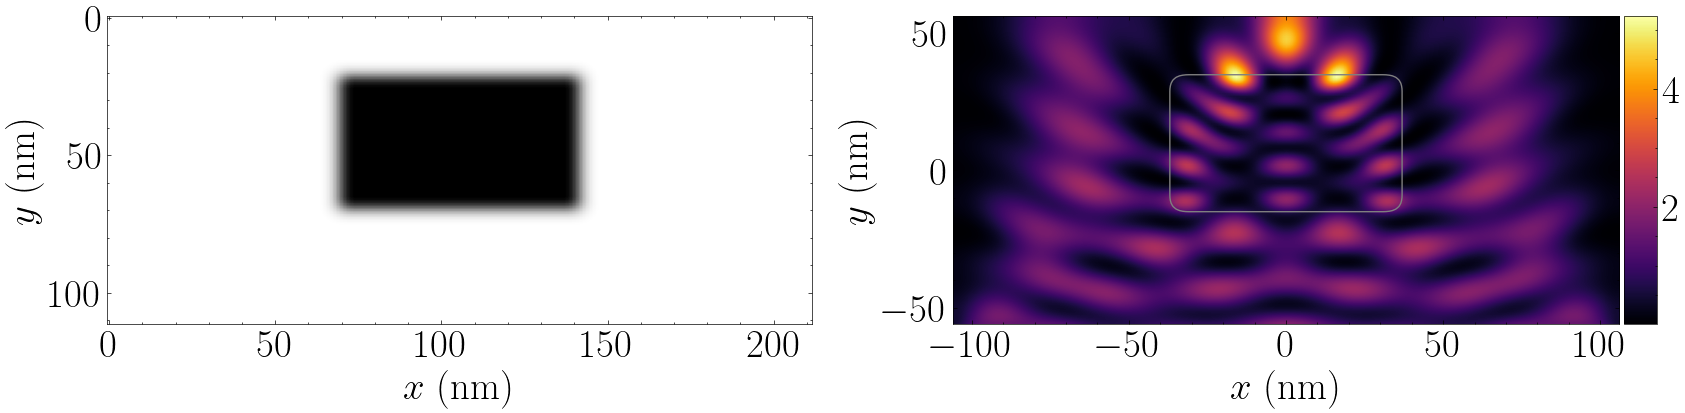

1.9688059470563828


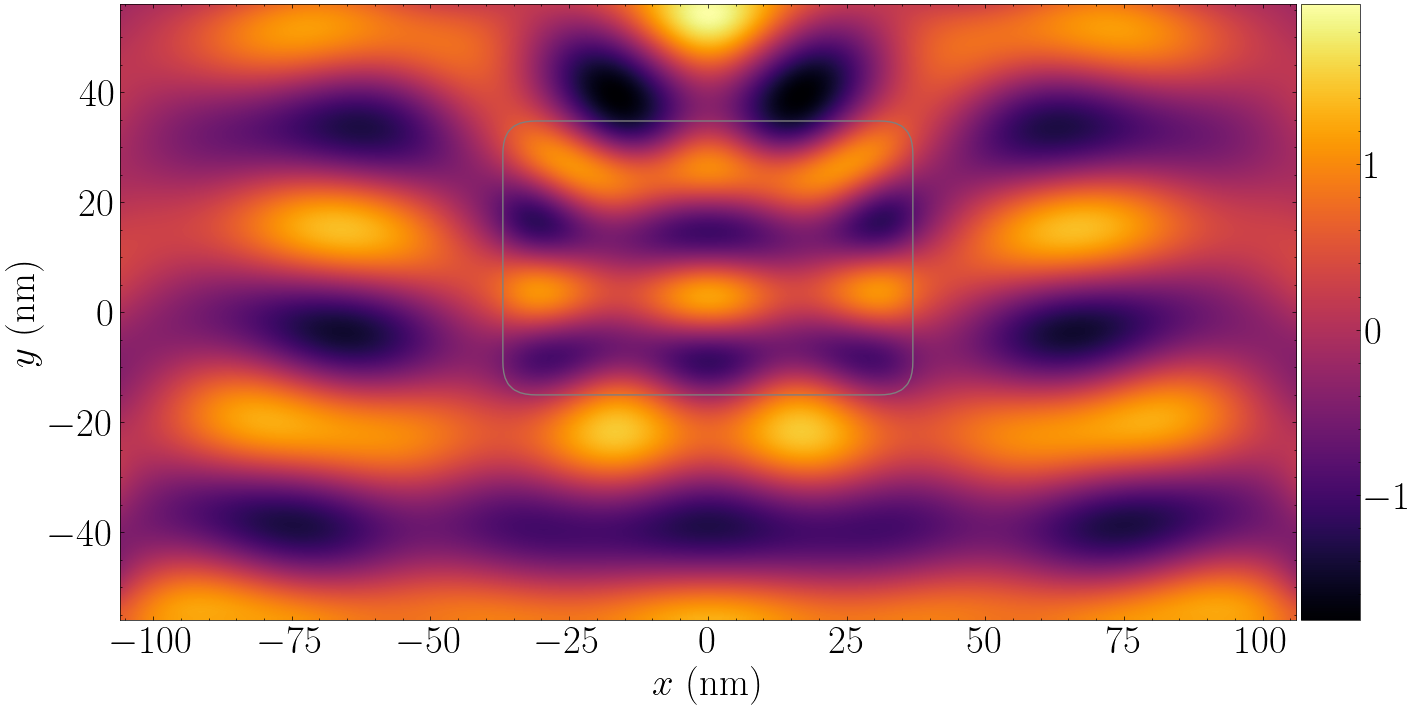

In [11]:
dVs = DVini
dVs_part = DVini_part 
Ez, FOM = solver.solve_forward(dVs, dVs_part)

----------------------------------------------
Optimization iteration:  0
FOM:  (1.1780483296219533+0j)
Elapsed time in iteration: 0 min 9 s
----------------------------------------------


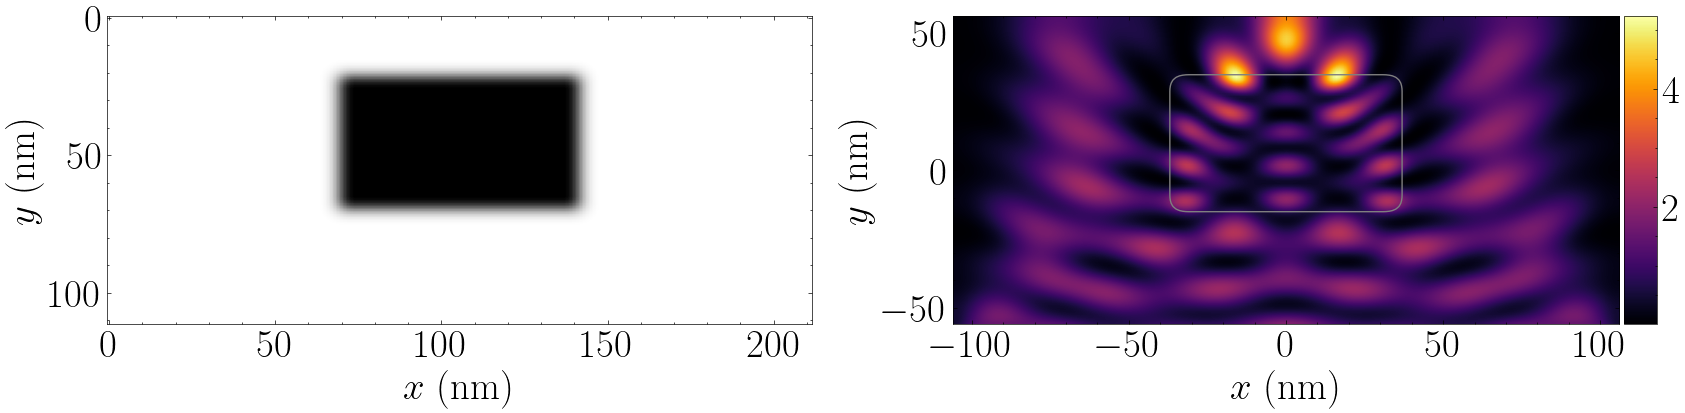

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------
Iteration history
----------------------------------------------


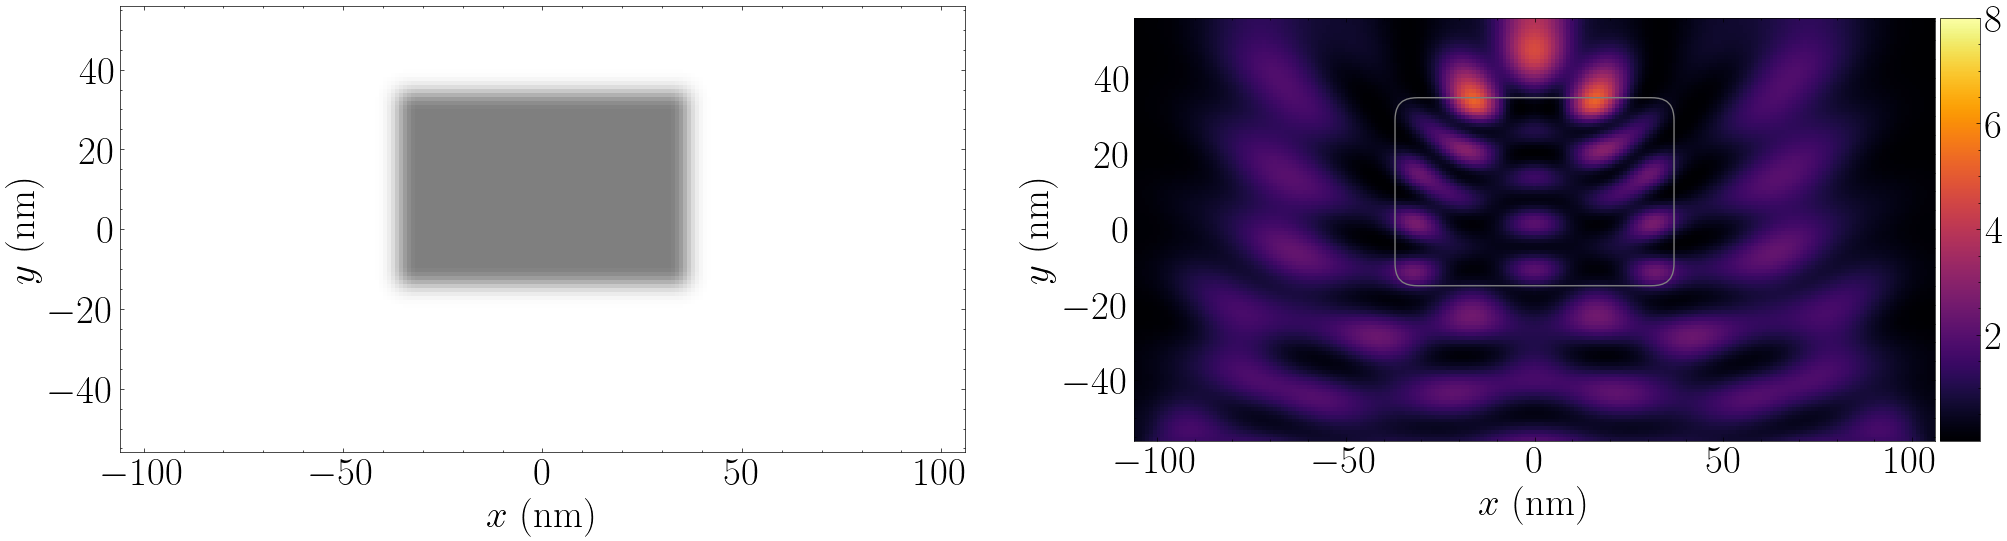

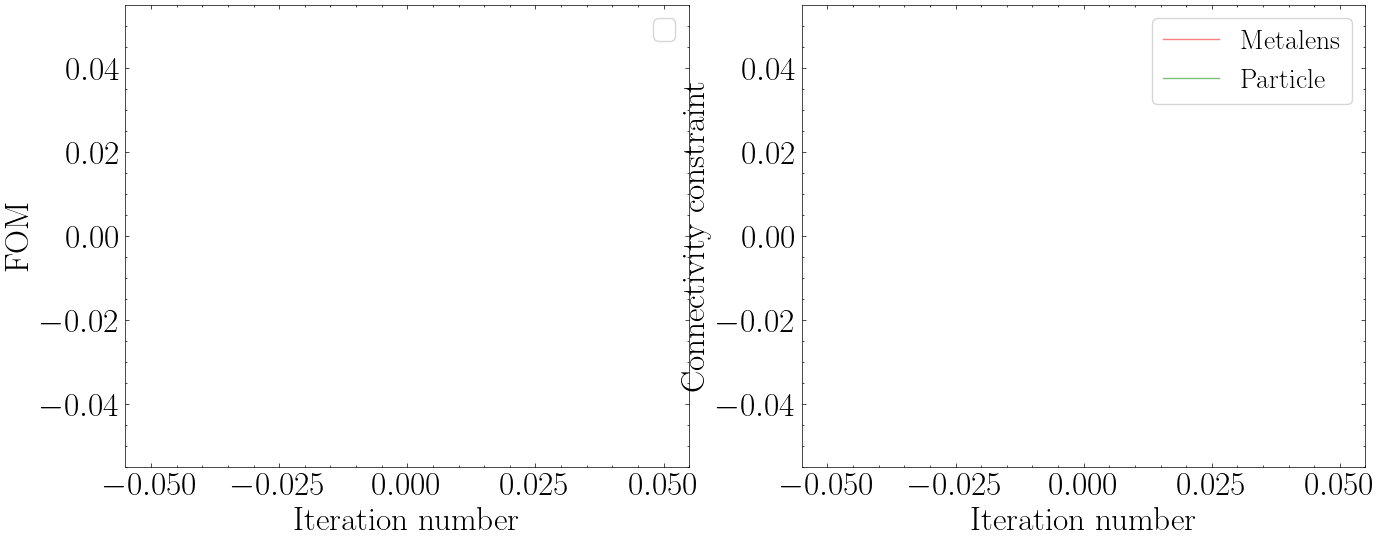

----------------------------------------------
Optimization iteration:  1
----------------------------------------------
Optimization iteration:  1
FOM:  (0.4540528975460147+0j)
Elapsed time in iteration: 0 min 9 s
----------------------------------------------


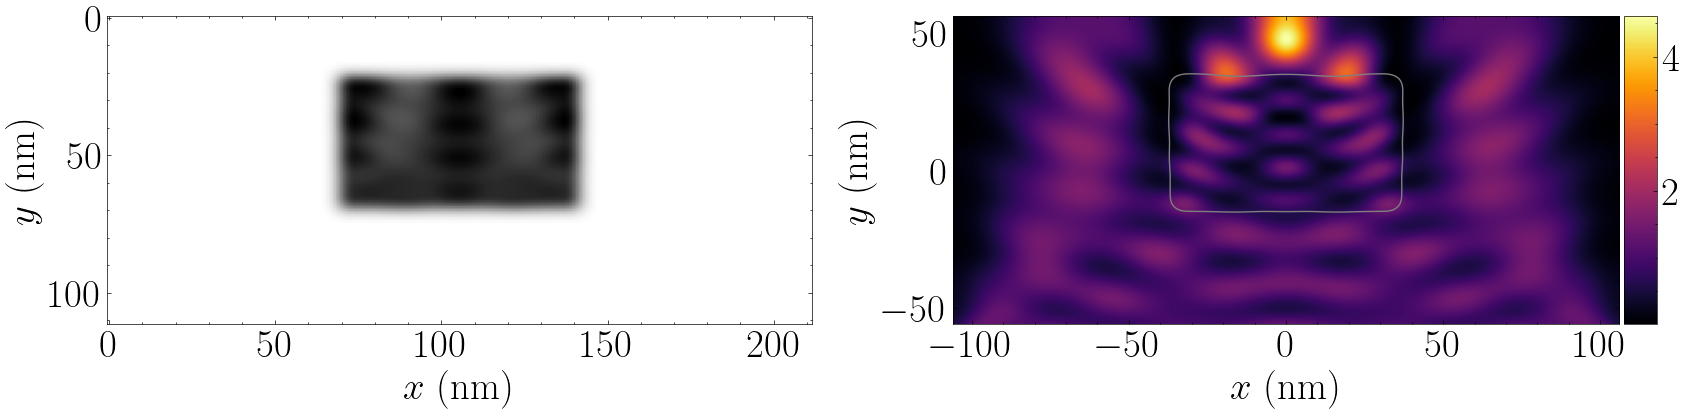

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------
Iteration history
----------------------------------------------


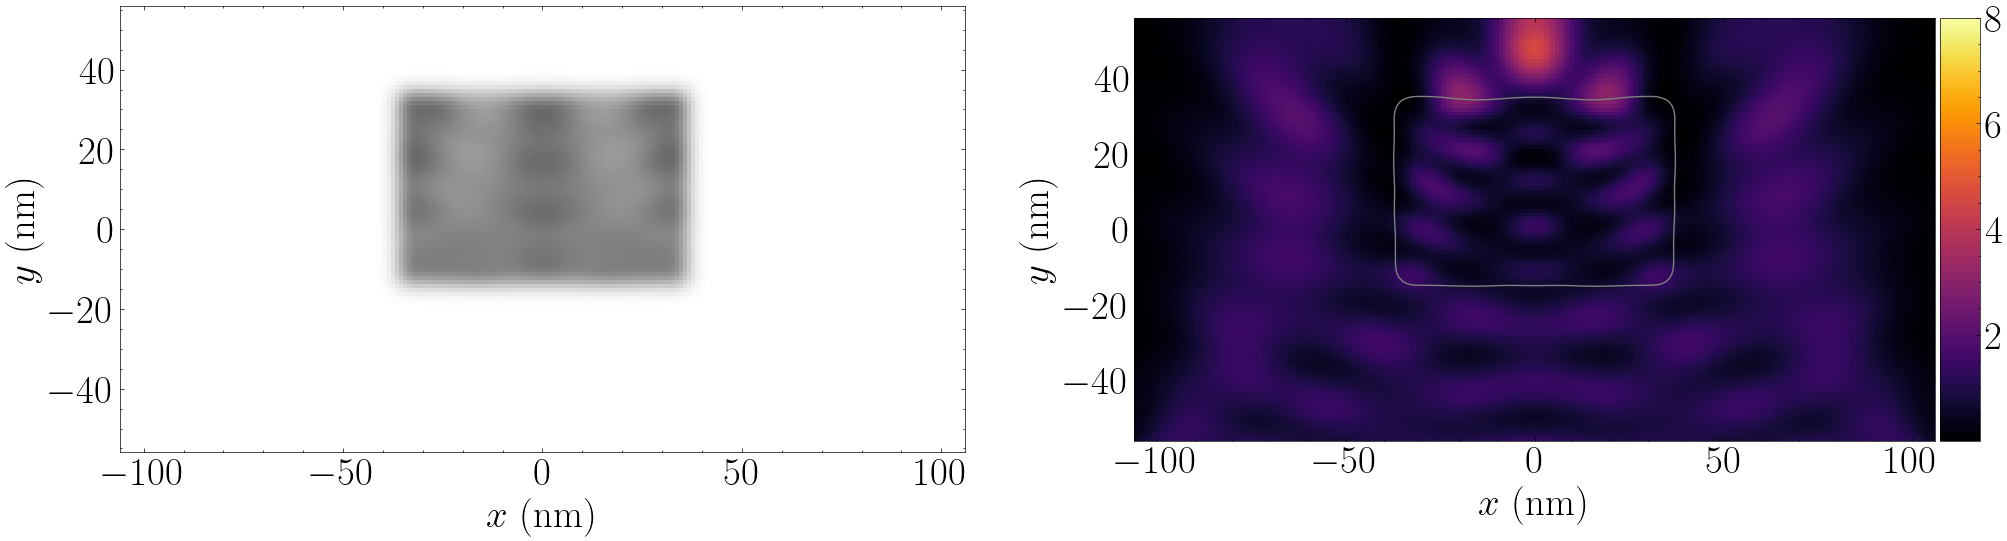

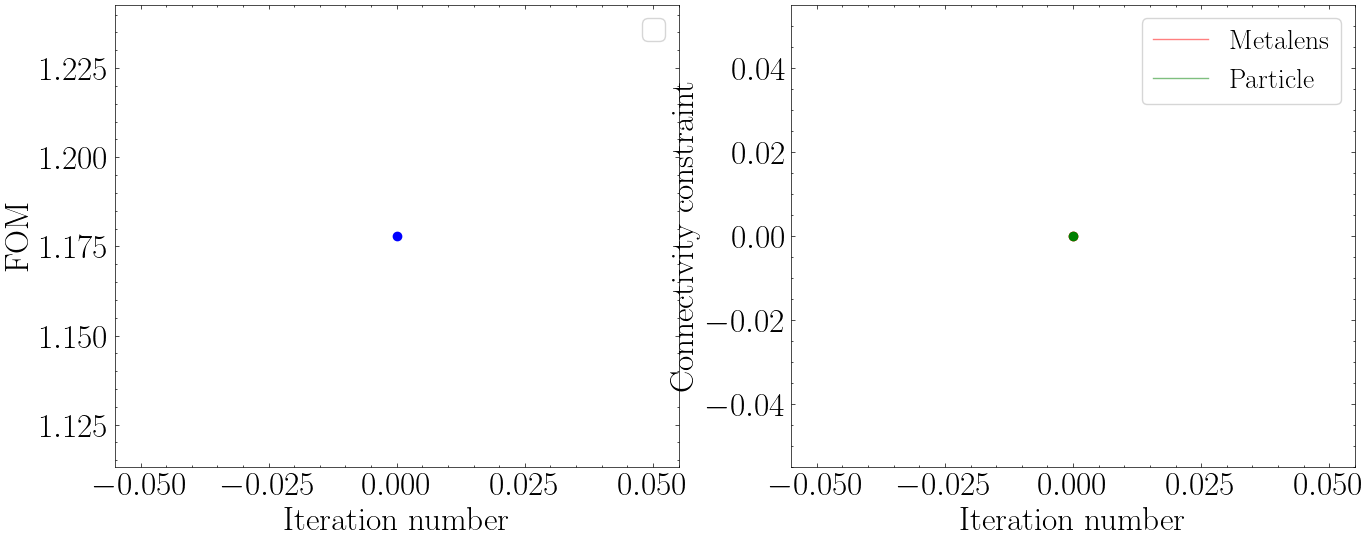

----------------------------------------------
Optimization iteration:  2
----------------------------------------------
Optimization iteration:  2
FOM:  (0.30054854947363974+0j)
Elapsed time in iteration: 0 min 11 s
----------------------------------------------


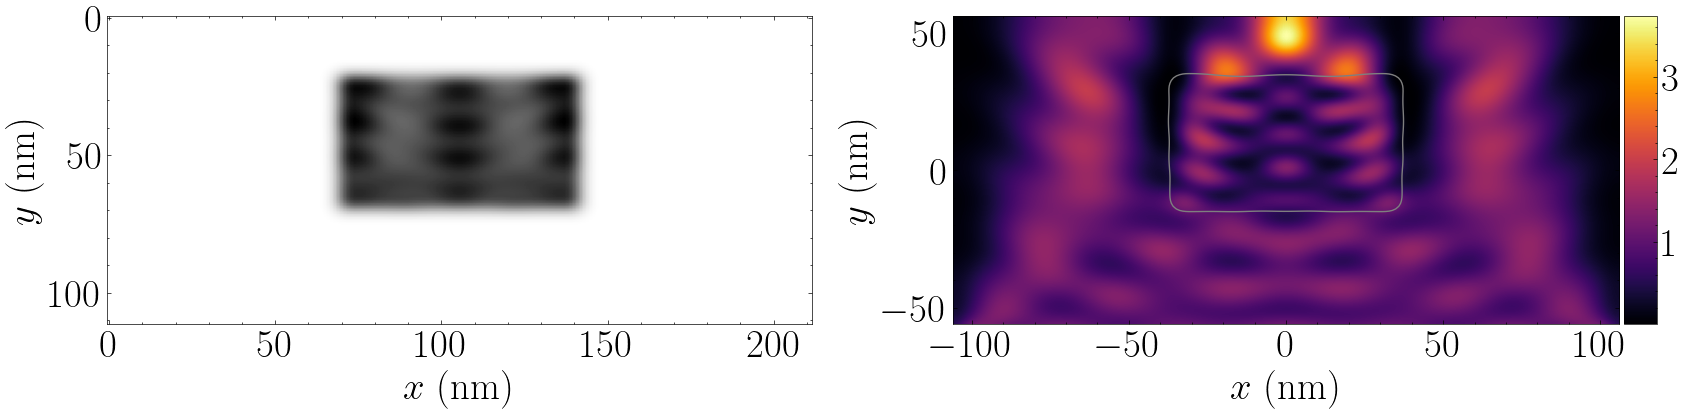

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------
Iteration history
----------------------------------------------


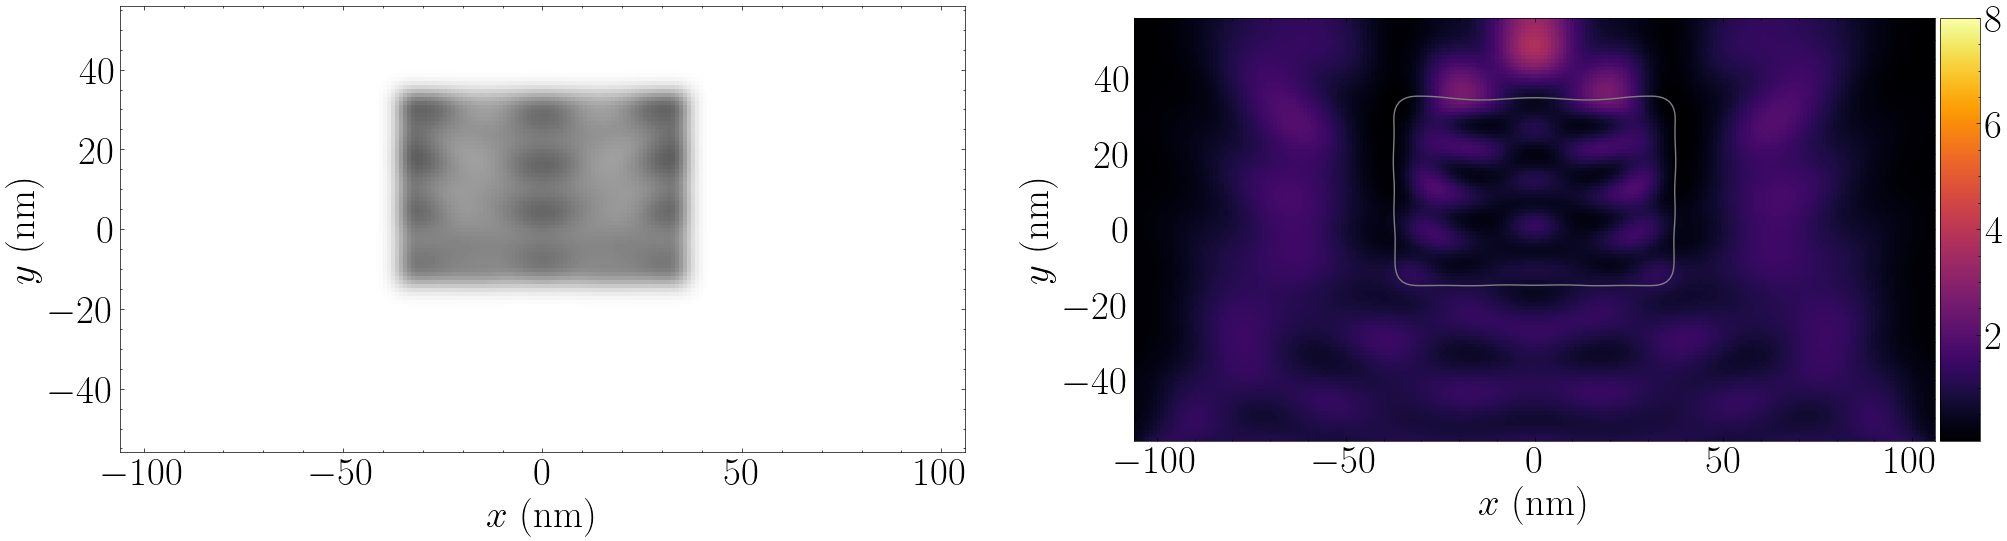

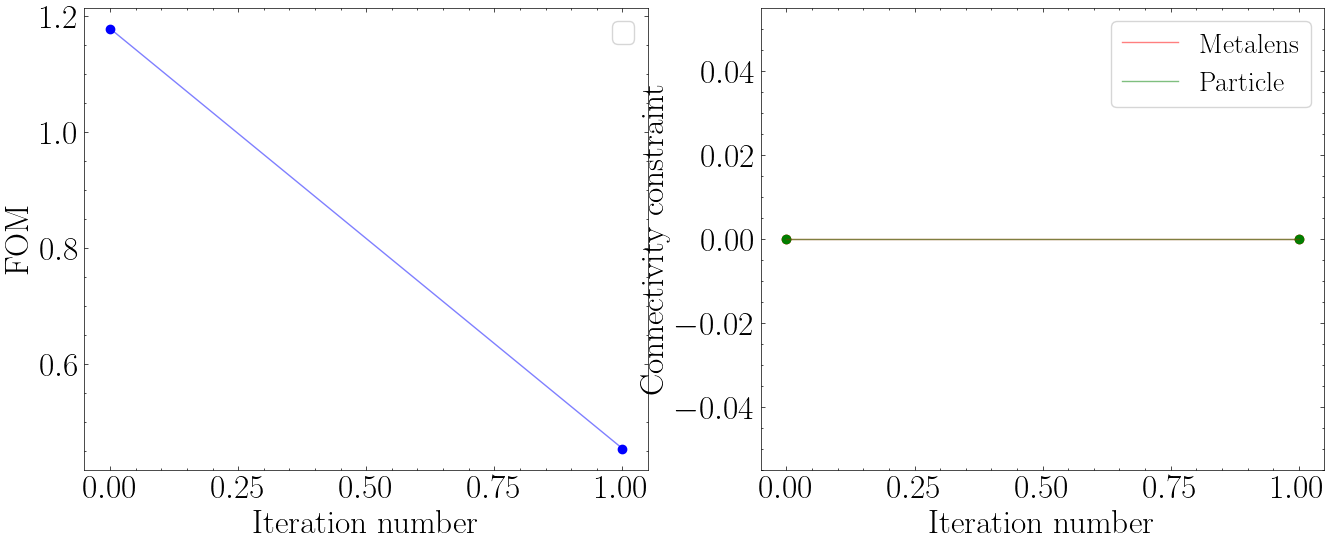

----------------------------------------------
Optimization iteration:  3
----------------------------------------------
Optimization iteration:  3
FOM:  (0.2238678418281804+0j)
Elapsed time in iteration: 0 min 9 s
----------------------------------------------


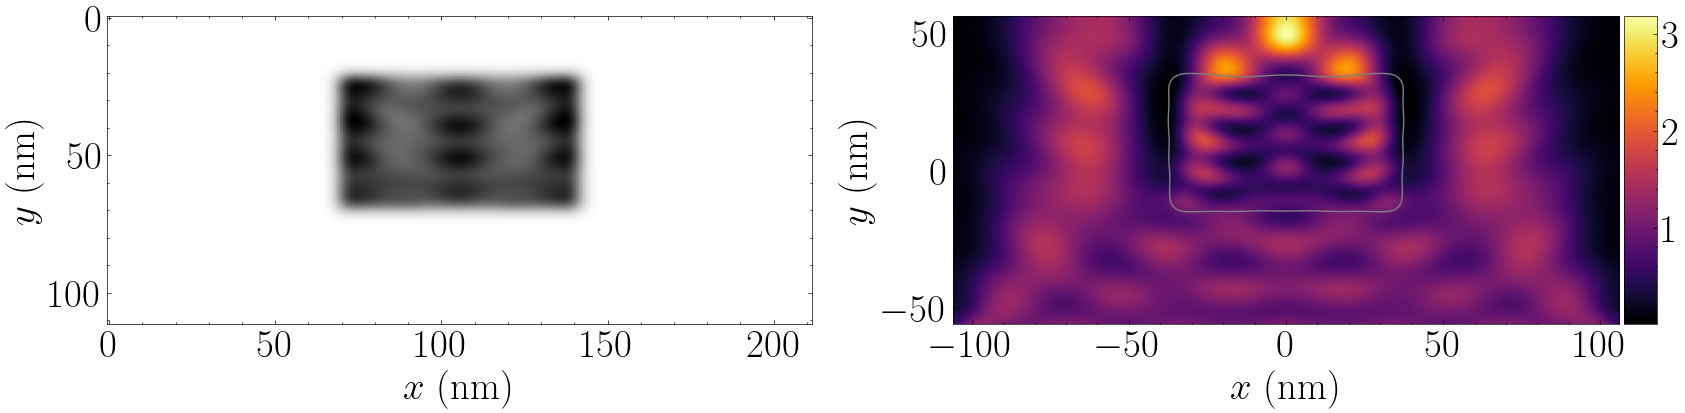

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------
Iteration history
----------------------------------------------


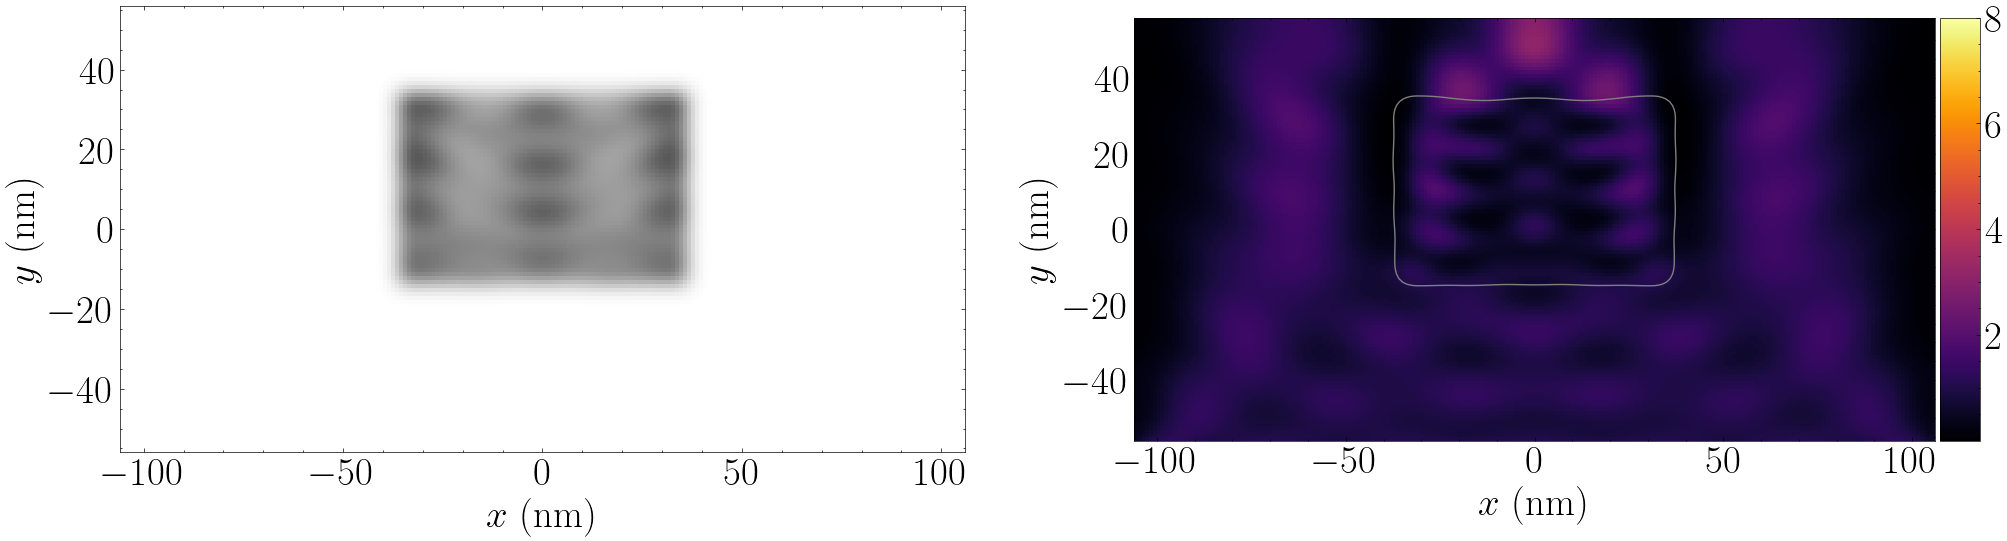

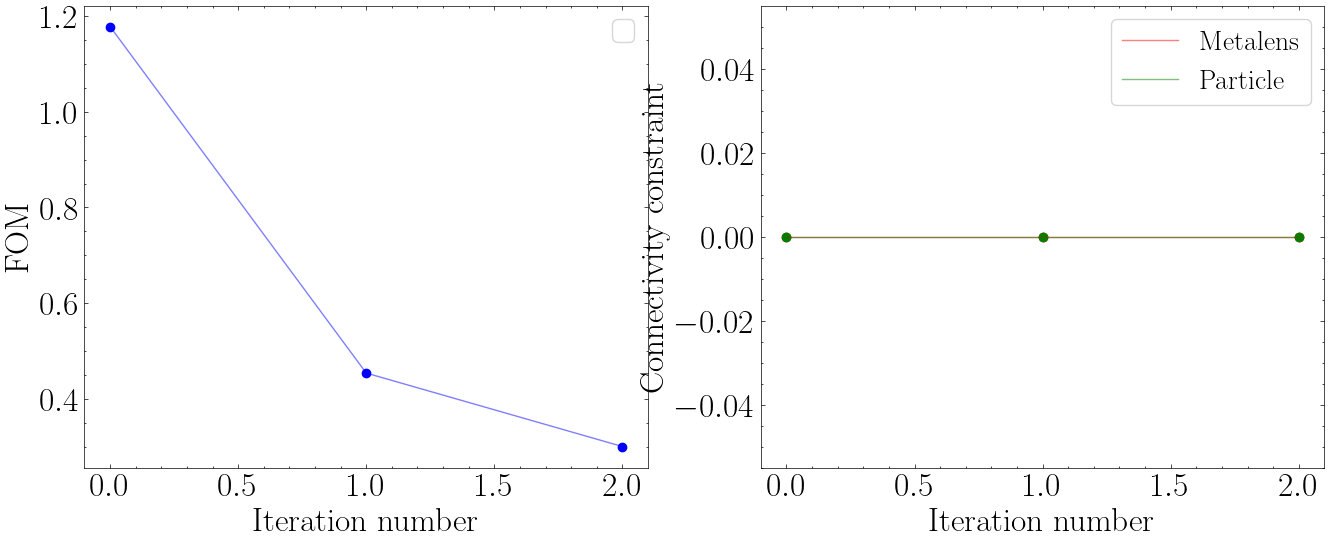

----------------------------------------------
Optimization iteration:  4
----------------------------------------------
Optimization iteration:  4
FOM:  (0.17966502379078758+0j)
Elapsed time in iteration: 0 min 10 s
----------------------------------------------


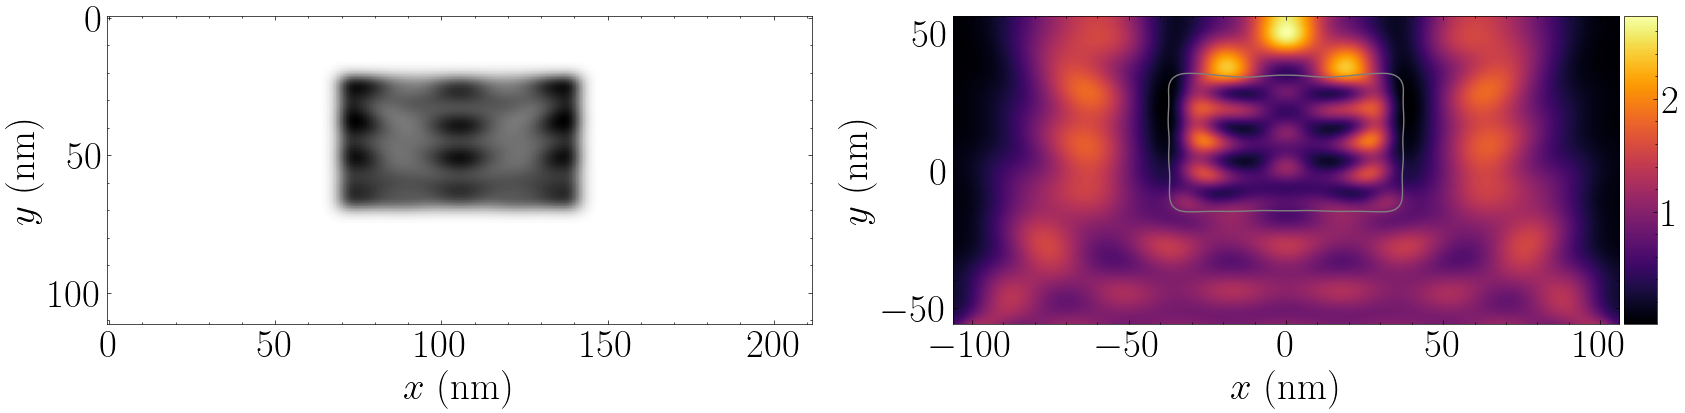

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------
Iteration history
----------------------------------------------


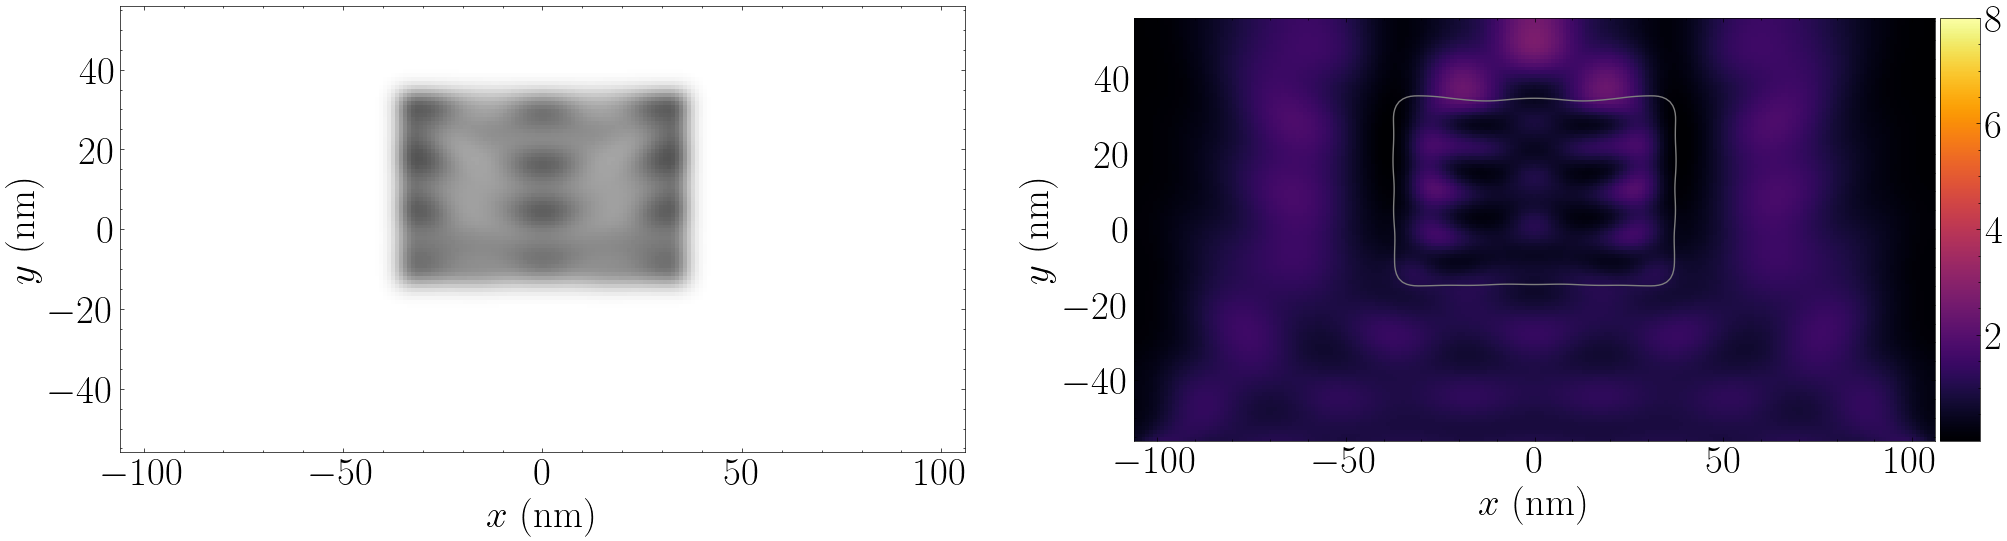

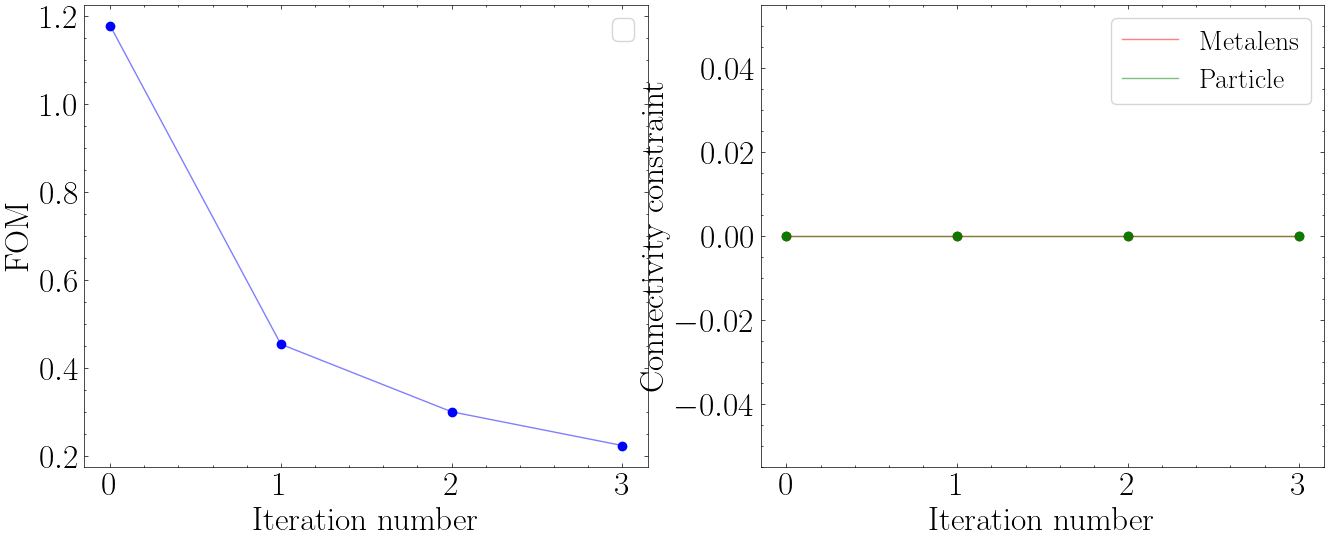

----------------------------------------------
Optimization iteration:  5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------
Total optimization time: 1 min 5 s
----------------------------------------------
----------------------------------------------
Iteration history
----------------------------------------------


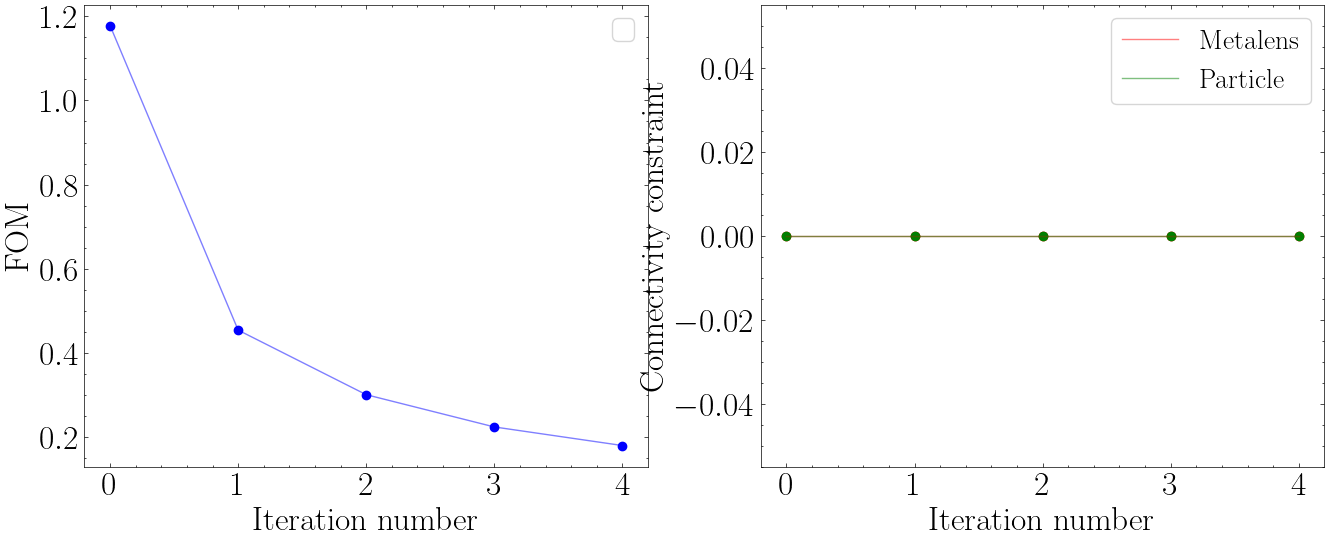

In [12]:
dVs_tot = solver.optimize(maxItr, alg)

In [14]:
dVs_new = np.load("dVs.npy")
dVs_part_new = np.load("dVs_part.npy")

FOM:  (0.153382347743157+0j)
Elapsed time in iteration: 0 min 10 s
----------------------------------------------


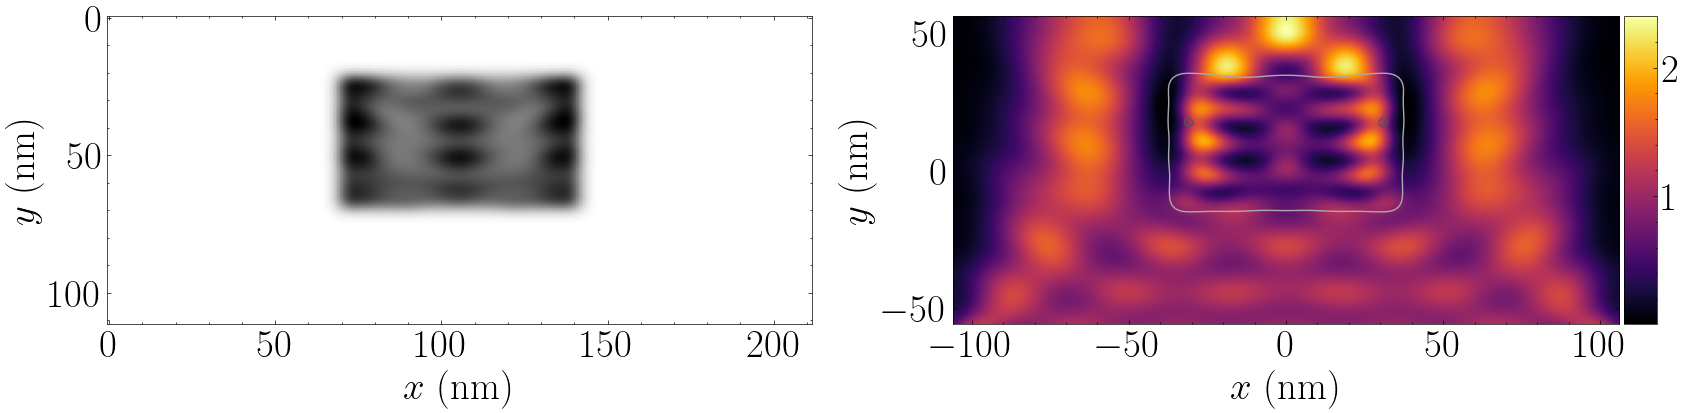

1.5074343182373982


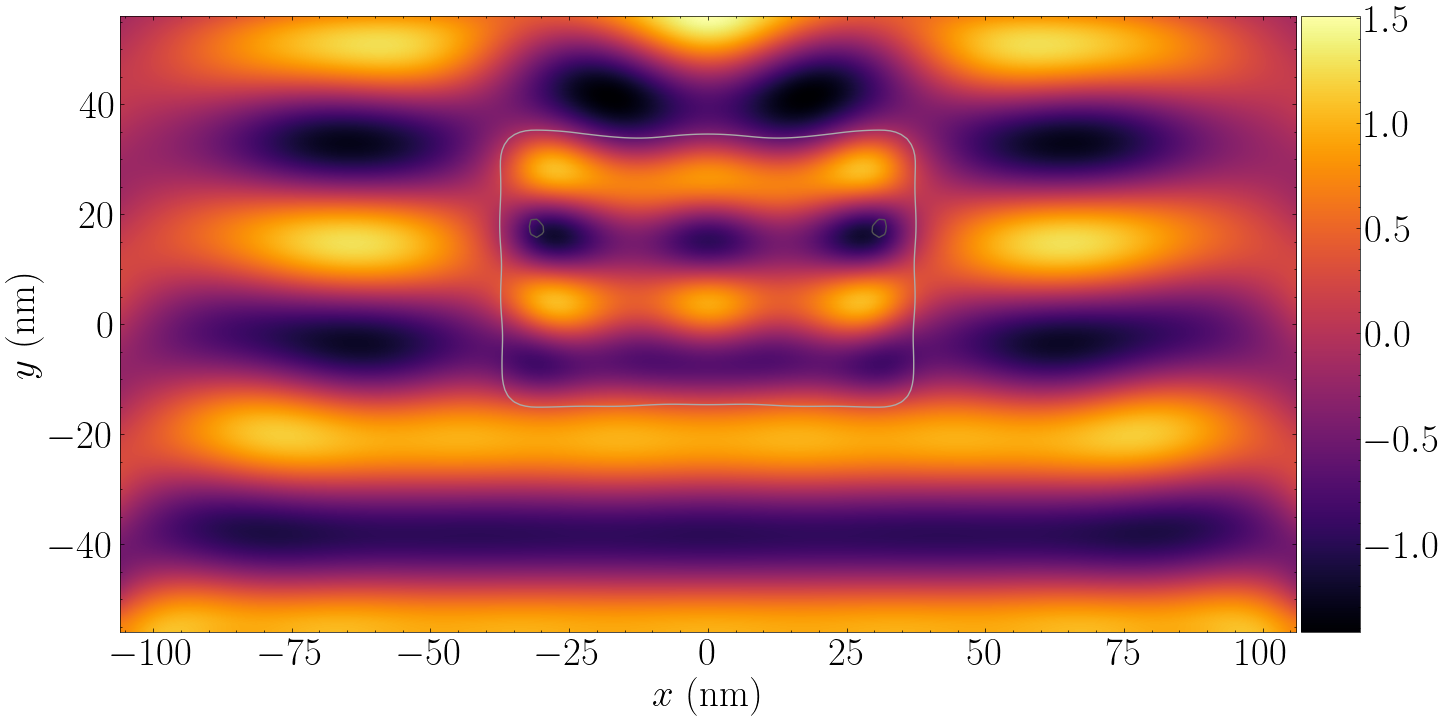

In [16]:
Ez, FOM = solver.solve_forward(dVs_new, dVs_part_new)